In [56]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [57]:
path = r'D:\dau\Assignments\FoML-lab\Lab06-clustering-using-scikit-learn-AdityaJana011\Mall_Customers.csv'
df = pd.read_csv(path)

In [58]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [59]:
df.shape

(200, 5)

In [60]:
# Info about The Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [61]:
# Describe the Data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


## EDA

In [62]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [63]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

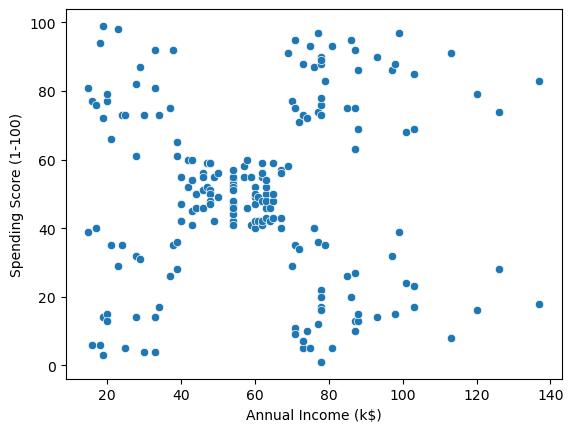

In [64]:
sns.scatterplot(data=X, x='Annual Income (k$)', y='Spending Score (1-100)')

## Data Preprocessing

In [65]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

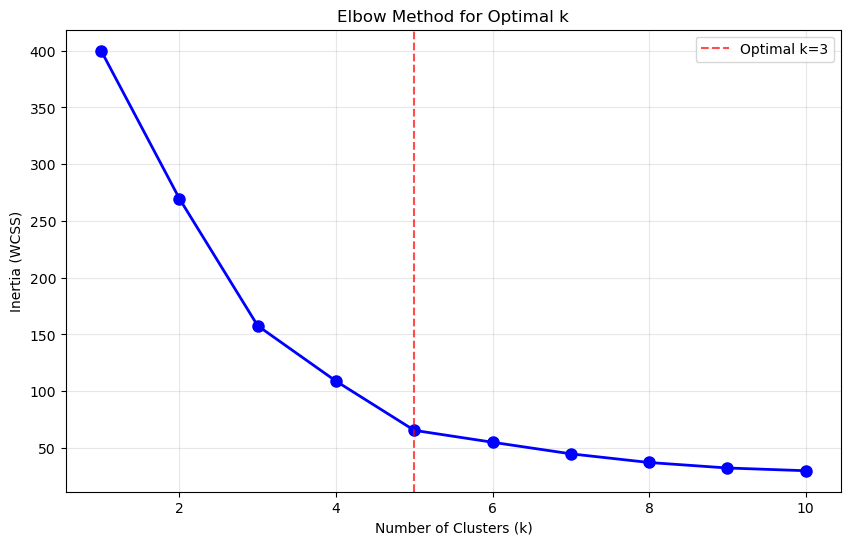

In [66]:
# Elbow method
result = []
K_range = range(1, 11)

for k in K_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_temp.fit(X_scaled)
    result.append(kmeans_temp.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K_range, result, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.grid(True, alpha=0.3)
plt.axvline(x=5, color='red', linestyle='--', alpha=0.7, label='Optimal k=3')
plt.legend()
plt.show()

In [67]:
# Apply K-Means clustering on optimal value of K
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

print("K-Means cluster centers:")
print(kmeans.cluster_centers_)

print("\nCluster assignments:")
print(np.bincount(kmeans_labels))

print(f"\nInertia (WCSS): {kmeans.inertia_:.2f}")
print("\nCluster labels:")
print(kmeans.labels_)

K-Means cluster centers:
[[-0.20091257 -0.02645617]
 [ 0.99158305  1.23950275]
 [-1.32954532  1.13217788]
 [ 1.05500302 -1.28443907]
 [-1.30751869 -1.13696536]]

Cluster assignments:
[81 39 22 35 23]

Inertia (WCSS): 65.57

Cluster labels:
[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


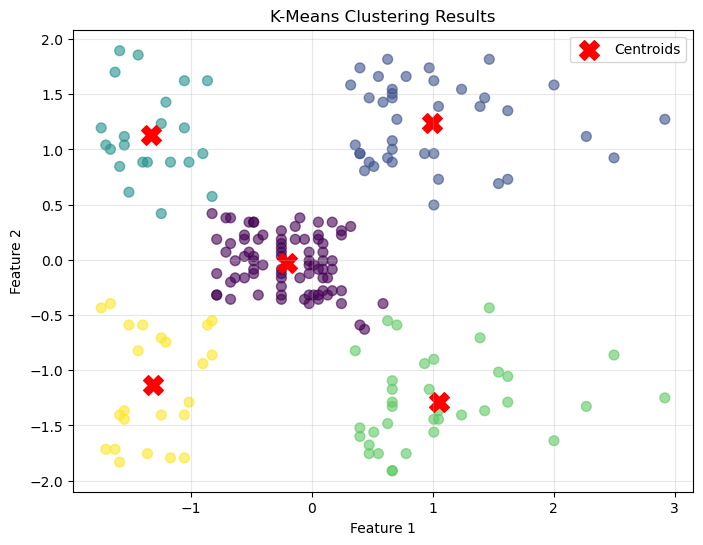

In [68]:
# Visualize K-Means Results

plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis', s=50, alpha=0.6)

# plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            c='red', s=200, marker='X', label='Centroids')

plt.title('K-Means Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


### TASK 3 Agglomerative Hierarchical Clustering

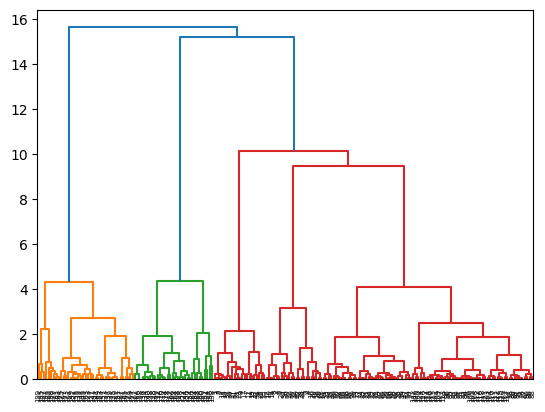

In [69]:
## Creating a Dendrogram

from scipy.cluster.hierarchy import dendrogram, linkage

linkage_data = linkage(X_scaled, method='ward', metric='euclidean')
dn = dendrogram(linkage_data)

In [70]:
hc = AgglomerativeClustering(n_clusters = 5,linkage ='ward')
hierarchy_label=hc.fit_predict(X_scaled)

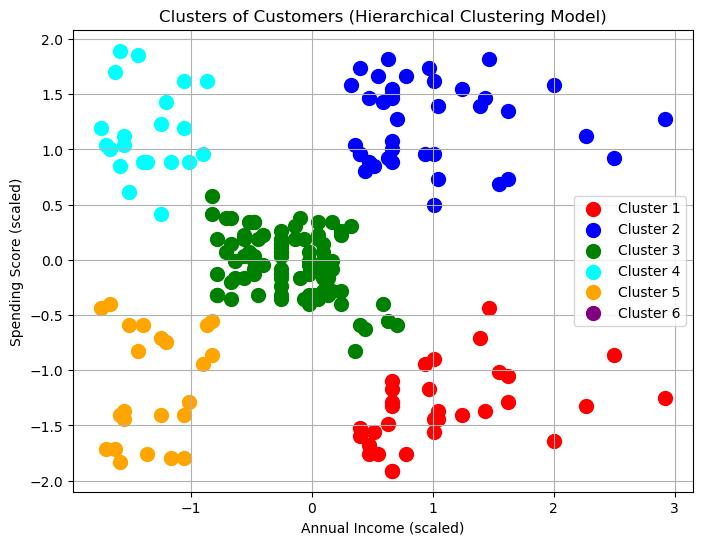

In [71]:
import matplotlib.pyplot as plt

colors = ['red', 'blue', 'green', 'cyan', 'orange', 'purple']
labels = ['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5','Cluster 6']

plt.figure(figsize=(8,6))
for i in range(6):
    plt.scatter(X_scaled[hierarchy_label == i, 0],
                X_scaled[hierarchy_label == i, 1],
                s=100, c=colors[i], label=labels[i])

plt.title('Clusters of Customers (Hierarchical Clustering Model)')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.grid(True)
plt.show()

### Part 4: DBSCAN Clustering

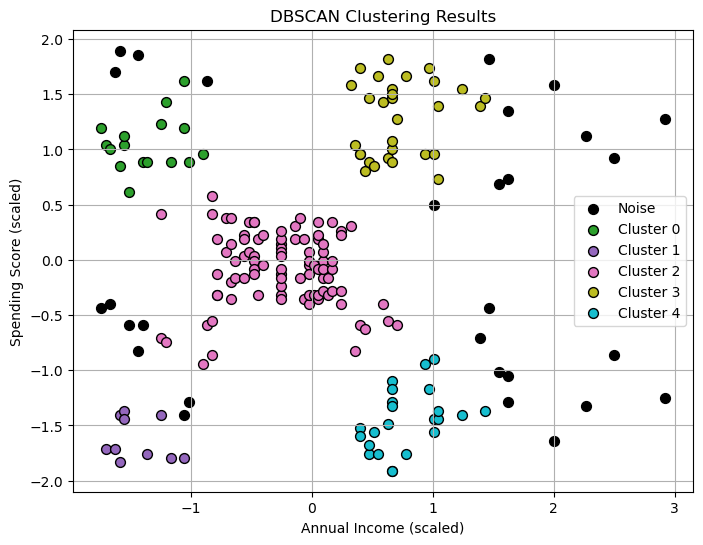

In [79]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.45, min_samples=10)
dbscan_labels = dbscan.fit_predict(X_scaled)


labels = dbscan_labels
unique_labels = np.unique(labels)

plt.figure(figsize=(8,6))

colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(unique_labels, colors):
    if label == -1:
        color = 'black'
        label_name = 'Noise'
    else:
        label_name = f'Cluster {label}'
    
    plt.scatter(
        X_scaled[labels == label, 0], 
        X_scaled[labels == label, 1],  
        s=50,
        c=color,
        label=label_name,
        edgecolors='k',
        marker='o'  # ensure filled markers
    )

n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
plt.title(f'DBSCAN Clustering Results (Clusters found: {n_clusters})')
plt.title('DBSCAN Clustering Results')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.grid(True)
plt.show()